In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
from sklearn.datasets import load_boston
boston=load_boston()

In [4]:
feature=pd.DataFrame(boston.data,columns=boston.feature_names)
target=pd.DataFrame(boston.target)

In [5]:
feature.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
feature.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


# Transformation of target variable if it needs 

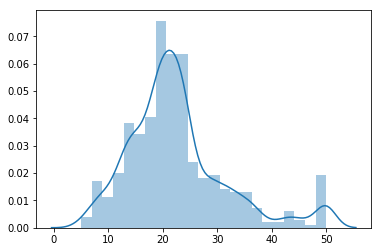

In [9]:
sns.distplot(target,hist=True)

In [10]:
target_log=np.log(target)

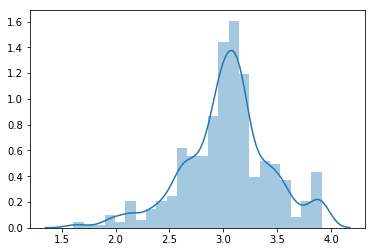

In [11]:
sns.distplot(target_log,hist=True)

# Feature engonering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002154DD1D5F8>,
      dtype=object)

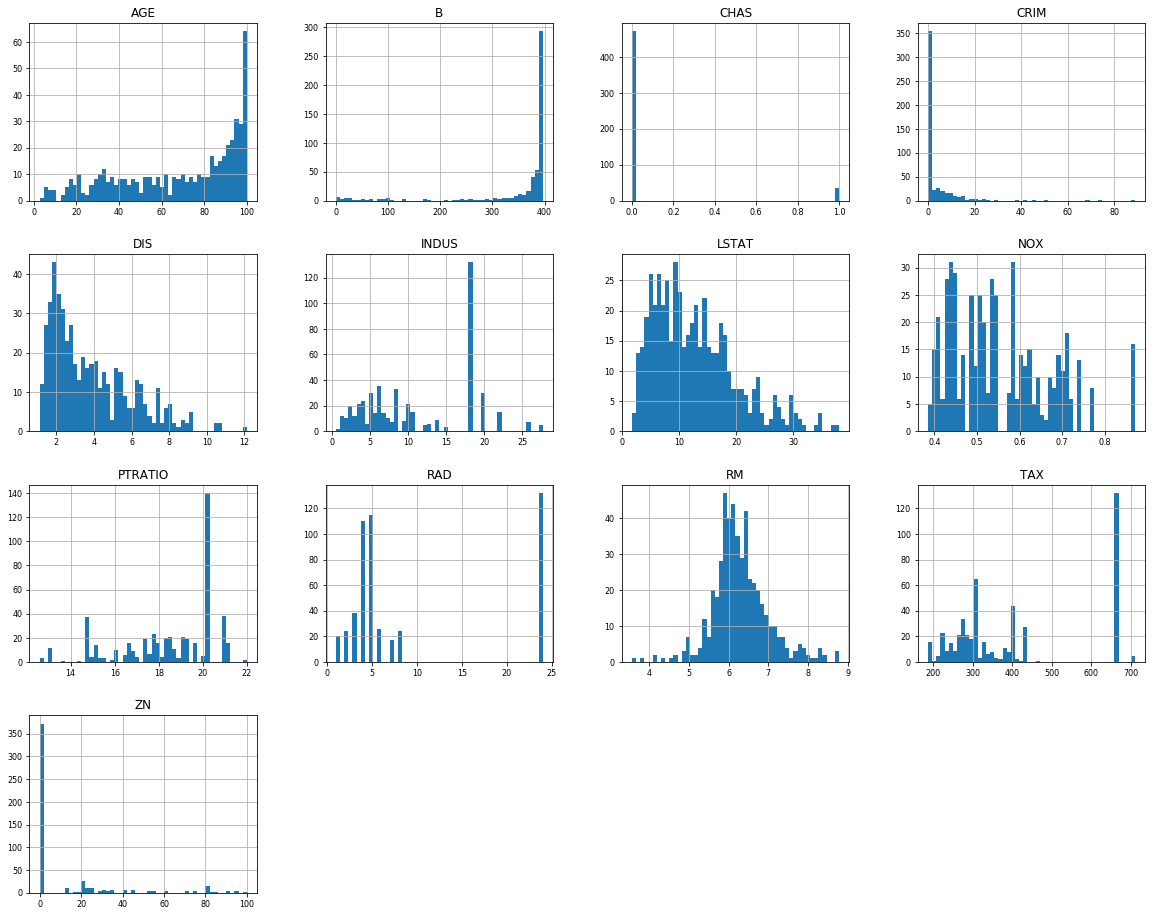

In [12]:
feature.hist(figsize=(20,16),bins=50,xlabelsize=8,ylabelsize=8) 

In [13]:
#remove the skuness in data

In [14]:
from  scipy.stats import skew 
skew_data=feature.apply(lambda x: skew(x.dropna()))
skew_data=skew_data[skew_data>.75]


In [15]:
skew_data

CRIM     5.207652
ZN       2.219063
CHAS     3.395799
DIS      1.008779
RAD      1.001833
LSTAT    0.903771
dtype: float64

In [16]:
feature[skew_data.index]=np.log1p(feature[skew_data.index])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002154E537588>,
      dtype=object)

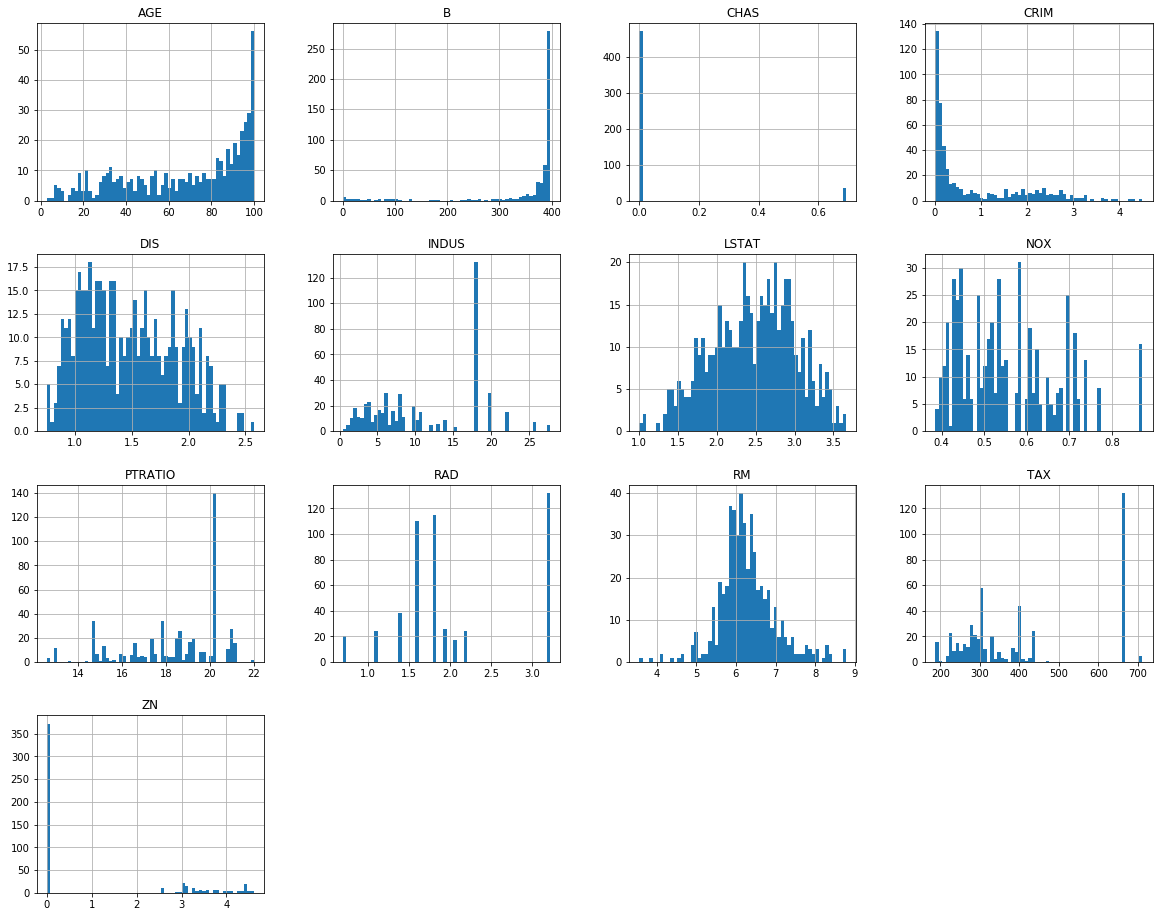

In [17]:
feature.hist(figsize=(20,16),bins=60,xlabelsize=10,ylabelsize=10)

# Normalizing the data

In [18]:
# x(normalized)=(x-x_min)/(x_max-x_min)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features=sc.fit_transform(feature)

In [20]:
data=pd.DataFrame(features,columns=feature.columns)

In [21]:
feature=data

In [22]:
feature.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.789960,1.229330,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.357474,-1.812467,-0.666608,-1.459000,0.441052,-1.276118
1,-0.769755,-0.589091,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.742438,-1.272635,-0.987329,-0.303094,0.441052,-0.295491
2,-0.769774,-0.589091,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.742438,-1.272635,-0.987329,-0.303094,0.396427,-1.597382
3,-0.764946,-0.589091,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.150436,-0.889619,-1.106115,0.113032,0.416163,-2.050937
4,-0.730775,-0.589091,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.150436,-0.889619,-1.106115,0.113032,0.441052,-1.170492


In [23]:
feature.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

# corelation methood


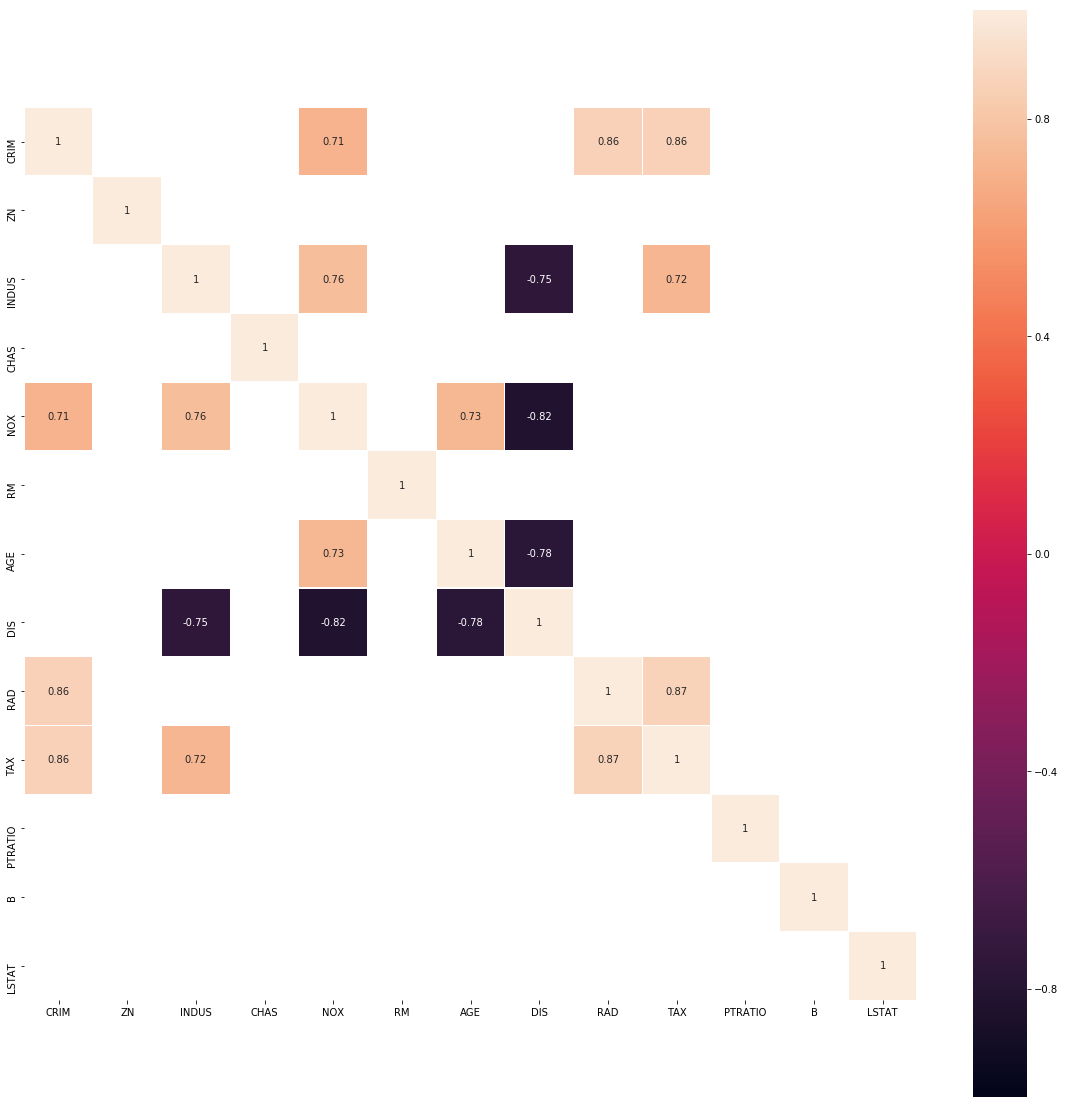

In [36]:

corr=feature.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[(corr>=0.7) | (corr<=-0.7)],vmax=-1.0,vmin=1.0,square=True,linewidth=0.1,annot=True)
plt.show()

# model fitting

In [43]:
from sklearn.model_selection import train_test_split

In [44]:

x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr=LinearRegression()

In [47]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
pred=lr.predict(x_test)

In [49]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.725160728216466


In [50]:
lr.coef_

array([[-1.28723447,  0.15756787, -0.16127024,  0.51534821, -1.74049472,
         1.99008158,  0.23754669, -3.11385503,  1.72265275, -1.10764334,
        -1.9608636 ,  0.37141924, -5.21669072]])

In [51]:
lr.intercept_

array([22.4687458])

# model building using stats model

In [58]:
import statsmodels.api as sm
model1=sm.OLS(y_train,x_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     4.546
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           3.48e-07
Time:                        12:47:31   Log-Likelihood:                -1606.9
No. Observations:                 354   AIC:                             3240.
Df Residuals:                     341   BIC:                             3290.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -1.6118      3.105     -0.519      0.604      -7.720       4.496
ZN             2.2308      1.865      1.196      0.232      -1.438       5.899
INDUS          0.4729      2.398      0.197      0.844      -4.244       5.190
CHAS          -0.1430      1.305     -0.110      0.913      -2.709       2.423
NOX            0.9486      2.719      0.349      0.727      -4.400       6.297
RM             2.3407      1.775      1.319      0.188      -1.151       5.832
AGE            1.2325      2.330      0.529      0.597      -3.350       5.815
DIS           -3.5879      2.818     -1.273      0.204      -9.131       1.956
RAD            2.2054      3.020      0.730      0.466      -3.735       8.146
TAX           -4.1268      3.266     -1.264      0.207     -10.550       2.296
PTRATIO        0.1850      1.666      0.111      0.912      -3.092       3.462
B              1.2053      1.514      0.796      0.427      -1.773       4.184
LSTAT         -6.6235      2.237     -2.961      0.003     -11.023      -2.224
==============================================================================
Omnibus:                       21.389   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.074
Skew:                           0.433   Prob(JB):                     1.08e-07
Kurtosis:                       4.193   Cond. No.                         8.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
def rmse(prediction,target):
    difference=prediction-target
    squared_difference=difference ** 2
    mean_squared_difference= squared_difference.mean()
    rmse=np.sqrt(mean_squared_difference)
    return rmse

In [60]:
prediction=model1.predict(x_test)

In [65]:
print(r2_score(y_test,prediction))

-5.943091041983846


In [71]:
tmp=pd.Series({
    'model':'base linear model',
    'r_squared':model1.rsquared,
    'adj_r_squared':model1.rsquared_adj,
    'rmse':'rmse(prediction,y_test)'})
})

SyntaxError: invalid syntax (<ipython-input-71-bed021395724>, line 6)

In [73]:
print(rmse(prediction,y_test))

0     NaN
1     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
10    NaN
12    NaN
15    NaN
21    NaN
26    NaN
37    NaN
45    NaN
46    NaN
49    NaN
52    NaN
54    NaN
55    NaN
56    NaN
59    NaN
60    NaN
65    NaN
71    NaN
74    NaN
75    NaN
76    NaN
78    NaN
90    NaN
96    NaN
       ..
410   NaN
411   NaN
415   NaN
416   NaN
417   NaN
418   NaN
419   NaN
426   NaN
428   NaN
430   NaN
435   NaN
438   NaN
446   NaN
451   NaN
455   NaN
459   NaN
469   NaN
474   NaN
475   NaN
478   NaN
480   NaN
481   NaN
487   NaN
491   NaN
494   NaN
495   NaN
497   NaN
498   NaN
502   NaN
505   NaN
Length: 153, dtype: float64
